# Deep Q-Learning Agent w/ Random Engine Failure

In [2]:
import os
import json
import wandb
import gymnasium as gym
from matplotlib import pyplot as plt
import seaborn as sns
from models.dqn import DQN

## Initializing Environment and Hyperparameters

In [ ]:
env = gym.make('LunarLander-v2', continuous=False, render_mode='rgb_array')
learning_rate = 0.0005
discount_factor = 0.99
exploration_rate = 1.0
episodes = 500
max_steps = 1000

## Training

In [7]:
agent = DQL(env, learning_rate, discount_factor, exploration_rate, 
            random_engine_fail=True, engine_fail_prob=0.2, fname='dql_ef')
history = agent.train(episodes, max_steps, log_wandb=True, save_episodes=True, save_interval=100)

[EP 1/500] - Reward: -170.1354 - Steps: 59 - Eps: 1.0000 - Time: 2.09s
[EP 2/500] - Reward: -143.4501 - Steps: 92 - Eps: 0.4171 - Time: 19.34s
[EP 3/500] - Reward: -354.5994 - Steps: 153 - Eps: 0.0896 - Time: 34.64s
[EP 4/500] - Reward: -307.1106 - Steps: 139 - Eps: 0.0222 - Time: 30.59s
[EP 5/500] - Reward: -186.5009 - Steps: 134 - Eps: 0.0100 - Time: 30.40s
[EP 6/500] - Reward: -208.3315 - Steps: 106 - Eps: 0.0100 - Time: 23.65s
[EP 7/500] - Reward: -205.7238 - Steps: 177 - Eps: 0.0100 - Time: 39.91s
[EP 8/500] - Reward: -176.6733 - Steps: 119 - Eps: 0.0100 - Time: 26.78s
[EP 9/500] - Reward: -127.1665 - Steps: 1000 - Eps: 0.0100 - Time: 224.11s
[EP 10/500] - Reward: -266.9853 - Steps: 465 - Eps: 0.0100 - Time: 102.49s
[EP 11/500] - Reward: -63.3729 - Steps: 1000 - Eps: 0.0100 - Time: 218.99s
[EP 12/500] - Reward: -78.5141 - Steps: 1000 - Eps: 0.0100 - Time: 215.68s
[EP 13/500] - Reward: -165.0238 - Steps: 438 - Eps: 0.0100 - Time: 97.27s
[EP 14/500] - Reward: -32.0519 - Steps: 458 -

epsilon,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
reward,▁▄▄▄▃▂▄█▃███▇▇▄▄▃▃█▅▆▅▅▅▃▁▃▅▆▂█▇▂▅█▇▅█▅▆
steps,▂▂█▁▅▁▂▃▂▂▃▂▃▆▁▁▂▂▃▅▆▁▁█▂▂▂▁█▂▂▅▃▂▆▃▄▃██
epsilon,0.01
reward,-11.31945
steps,147


In [8]:
# save history
if not os.path.exists('./history'):
        os.mkdir('./history')

with open('./history/dqn_ef_history.json', 'w') as file:
    json.dump(history, file)

## Evaluation

In [3]:
with open('history\dql_ef_history.json', 'r') as file:
    history = json.load(file)

rewards, avg_rewards, steps = history['reward'], history['avg_reward_100'], history['steps']

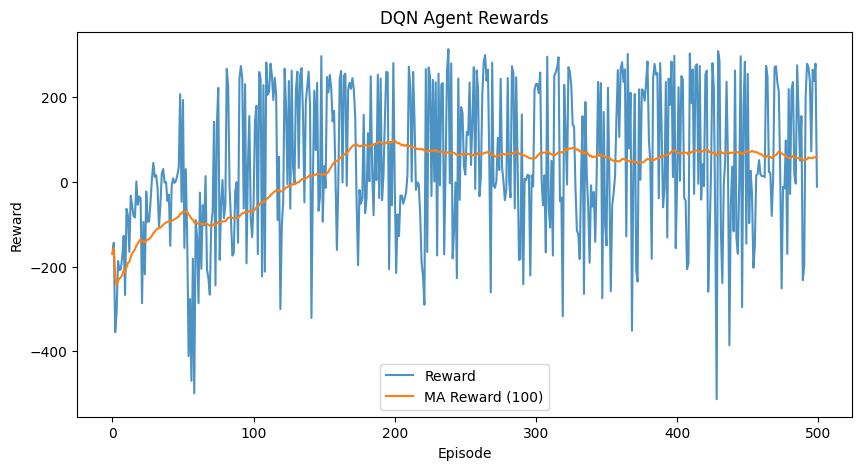

In [4]:
plt.figure(figsize=(10, 5))

plt.plot(rewards, alpha=0.8, label='Reward')
plt.plot(avg_rewards, label='MA Reward (100)')

plt.title('DQN Agent Rewards')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()

plt.show()

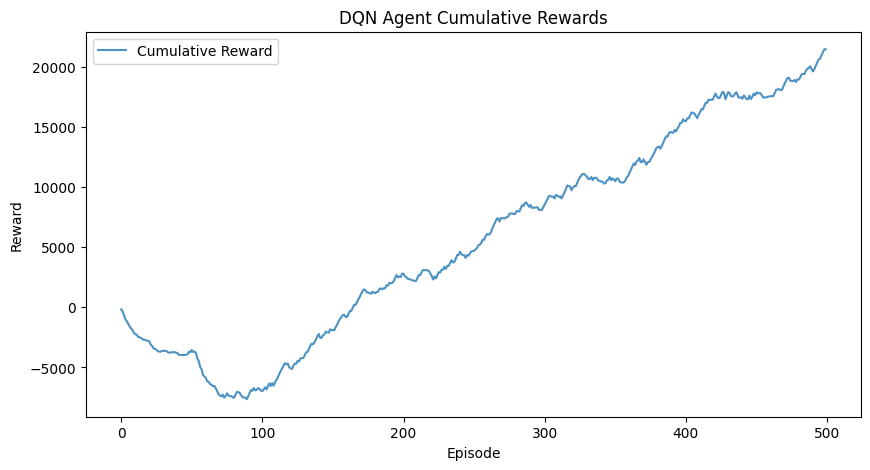

In [5]:
# plot cumulative reward
cumulative_reward = [sum(rewards[:i+1]) for i in range(len(rewards))]
plt.figure(figsize=(10, 5))

plt.plot(cumulative_reward, alpha=0.8, label='Cumulative Reward')

plt.title('DQN Agent Cumulative Rewards')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.show()

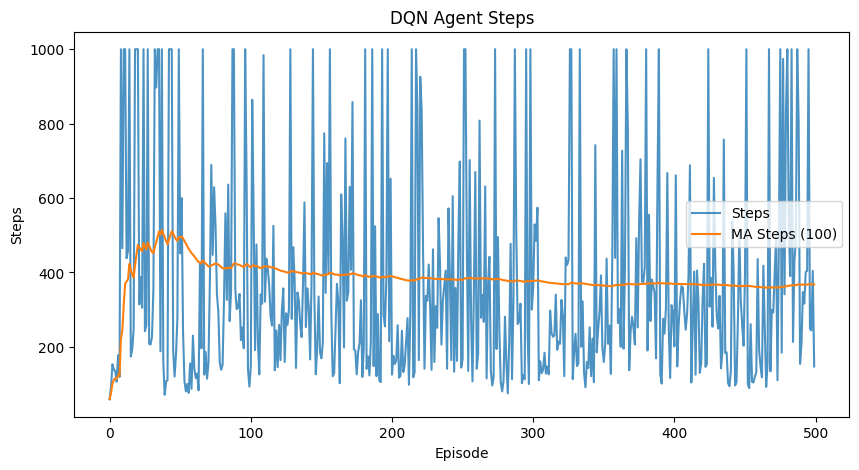

In [6]:
# plot steps and moving average steps
avg_steps = [sum(steps[:i+1])/(i+1) for i in range(len(steps))]
plt.figure(figsize=(10, 5))

plt.plot(steps, alpha=0.8, label='Steps')
plt.plot(avg_steps, label='MA Steps (100)')

plt.title('DQN Agent Steps')
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.legend()
plt.show()